In [414]:
#IMPORT DEPENDENCIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import collections
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [415]:
#IMPORT DATA
DATA = pd.read_csv("train.csv")

In [416]:
DATA = DATA.drop('Id', axis = 1)

In [417]:
DATA.tail()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
15115,2607,243,23,258,7,660,170,251,214,1282,...,0,0,0,0,0,0,0,0,0,3
15116,2603,121,19,633,195,618,249,221,91,1325,...,0,0,0,0,0,0,0,0,0,3
15117,2492,134,25,365,117,335,250,220,83,1187,...,0,0,0,0,0,0,0,0,0,3
15118,2487,167,28,218,101,242,229,237,119,932,...,0,0,0,0,0,0,0,0,0,3
15119,2475,197,34,319,78,270,189,244,164,914,...,0,0,0,0,0,0,0,0,0,3


In [418]:
DATA.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [419]:
DATA.shape

(15120, 55)

In [420]:
DATA.sort_index(inplace = True)

In [421]:
#Cover Type Features
features = DATA.drop('Cover_Type', axis = 1)

In [422]:
#Cover Types
target = DATA.Cover_Type

In [423]:
#split the data into test and train data
features_train, target_train = features[0:12096], target[0:12096]
features_test, target_test = features[12096:], target[12096:]

In [424]:
#Create MLP Deep Neural Network Classifier
model = MLPClassifier(hidden_layer_sizes=(150,100,50,20), max_iter=301,activation = 'relu',solver='adam', random_state=0)

In [425]:
#Train the model using the training sets
model.fit(features_train, target_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50, 20), max_iter=301,
              random_state=0)

In [426]:
#Predict the response for test dataset
Predicted_Values = model.predict(features_test)

In [427]:
# Model Accuracy
model.score(features_test, target_test)

0.8095238095238095

In [428]:
## Model Accuracy, how often has the Classifier predicted the correct target
model.score(features_test, target_test)

0.8095238095238095

In [429]:
print(classification_report(target_test, Predicted_Values))

              precision    recall  f1-score   support

           1       0.72      0.66      0.68       364
           2       0.51      0.40      0.45       249
           3       0.80      0.71      0.75       511
           4       0.93      0.95      0.94       530
           5       0.85      0.89      0.87       368
           6       0.76      0.86      0.80       505
           7       0.88      0.97      0.93       497

    accuracy                           0.81      3024
   macro avg       0.78      0.78      0.78      3024
weighted avg       0.80      0.81      0.80      3024



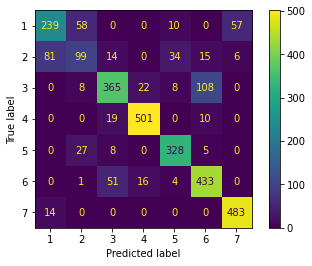

In [430]:
#Plot Confusion Matrix for the Classifier
CMatrix = confusion_matrix(target_test, Predicted_Values,labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=CMatrix, display_labels=model.classes_)
disp.plot()
plt.show()

In [431]:
#lOAD THE TEST DATA USED FOR COVER TYPE PREDICTION
TestDATA = pd.read_csv("test.csv")

In [432]:
TestDATA.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0


In [433]:
#Extract the features of the DataSet
TestFeatures = TestDATA.drop('Id', axis = 1)

In [434]:
TestFeatures.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2680,354,14,0,0,2684,196,214,156,6645,...,0,0,0,0,0,0,0,0,0,0
1,2683,0,13,0,0,2654,201,216,152,6675,...,0,0,0,0,0,0,0,0,0,0
2,2713,16,15,0,0,2980,206,208,137,6344,...,0,0,0,0,0,0,0,0,0,0
3,2709,24,17,0,0,2950,208,201,125,6374,...,0,0,0,0,0,0,0,0,0,0
4,2706,29,19,0,0,2920,210,195,115,6404,...,0,0,0,0,0,0,0,0,0,0


In [435]:
#Predict the Cover Type
CoverType = model.predict(TestFeatures)

In [436]:
display(CoverType[0:400])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 5, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 5, 5, 2, 2, 2, 5, 5, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 5, 5, 2,
       5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5,
       2, 5, 5, 5, 5, 5, 5, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5,

In [437]:
# getting the elements frequencies using Counter clas
Count=collections.Counter(CoverType)

In [440]:
#Frequency of of predicted Clasess
Frequency =collections.Counter(CoverType)
DF=pd.DataFrame(Frequency.items())
DF.columns=['Cover Type','Frequency']
DF = DF.sort_values(by='Cover Type')
Table = DF.set_index('Cover Type')
display(Table)

,Frequency
Cover Type,
1,224895
2,186268
3,33544
4,2394
5,41537
6,31030
7,46224


<AxesSubplot:xlabel='Cover Type'>

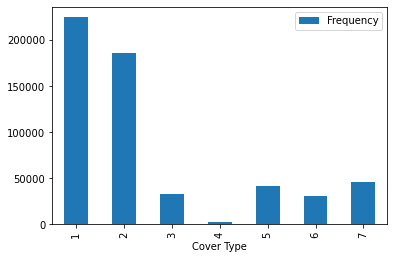

In [441]:
#Bar Graph of Frequency Vs Classes
DF.plot(kind='bar',x ='Cover Type',y='Frequency')